In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../data/gapminder.tsv', sep='\t')

In [3]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## What is the distribution of lifeExp?

In [4]:
data.lifeExp.describe()

count    1704.000000
mean       59.474439
std        12.917107
min        23.599000
25%        48.198000
50%        60.712500
75%        70.845500
max        82.603000
Name: lifeExp, dtype: float64

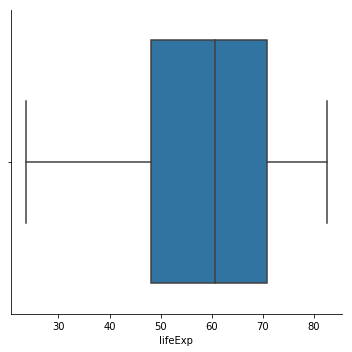

In [10]:
sns.catplot(x='lifeExp', data=data, kind='box')

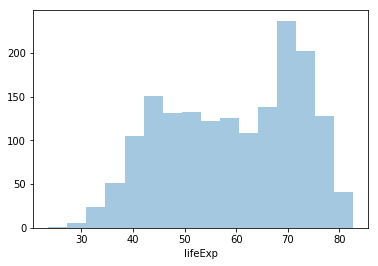

In [8]:
sns.distplot(data.lifeExp, kde=False)

## What is the distribution of lifeExp per continent

In [13]:
data.groupby('continent').lifeExp.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,624.0,48.865330,9.150210,23.599,42.37250,47.7920,54.41150,76.442
Americas,300.0,64.658737,9.345088,37.579,58.41000,67.0480,71.69950,80.653
Asia,396.0,60.064903,11.864532,28.801,51.42625,61.7915,69.50525,82.603
Europe,360.0,71.903686,5.433178,43.585,69.57000,72.2410,75.45050,81.757
Oceania,24.0,74.326208,3.795611,69.120,71.20500,73.6650,77.55250,81.235


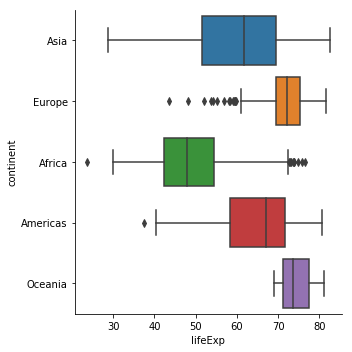

In [11]:
sns.catplot(x='lifeExp', y='continent', data=data, kind='box')

In [14]:
#data[data.continent=='Asia'].lifeExp

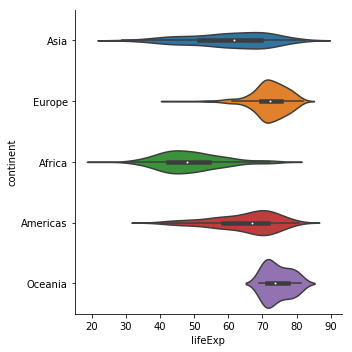

In [20]:
sns.catplot(x='lifeExp', y='continent', data=data, kind='violin')

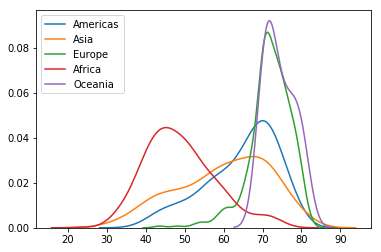

In [19]:
continents = set(data.continent)
for cont in continents:
    sns.kdeplot(data[data.continent==cont].lifeExp)
    plt.legend(continents)

## Break down the distribution of lifeExp per year

In [12]:
data.groupby('year').lifeExp.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1952,142.0,49.057620,12.225956,28.801,39.05900,45.1355,59.76500,72.670
1957,142.0,51.507401,12.231286,30.332,41.24750,48.3605,63.03675,73.470
1962,142.0,53.609249,12.097245,31.997,43.46850,50.8810,65.23450,73.680
1967,142.0,55.678290,11.718858,34.020,46.03375,53.8250,67.41950,74.160
1972,142.0,57.647386,11.381953,35.400,48.50025,56.5300,69.24750,74.720
1977,142.0,59.570157,11.227229,31.220,50.47550,59.6720,70.38250,76.110
1982,142.0,61.533197,10.770618,38.445,52.94000,62.4415,70.92125,77.110
1987,142.0,63.212613,10.556285,39.906,54.94075,65.8340,71.87725,78.670
1992,142.0,64.160338,11.227380,23.599,56.12175,67.7030,72.58250,79.360


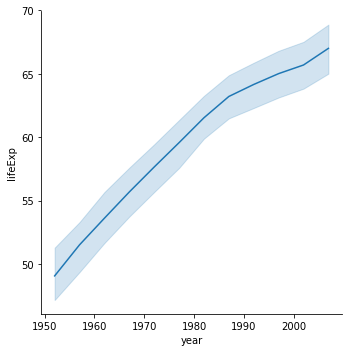

In [6]:
sns.relplot(x='year', y='lifeExp', kind='line', data=data)

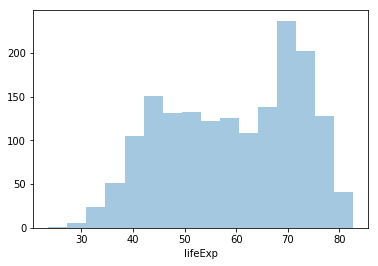

In [8]:
sns.distplot(data.lifeExp, kde=False)

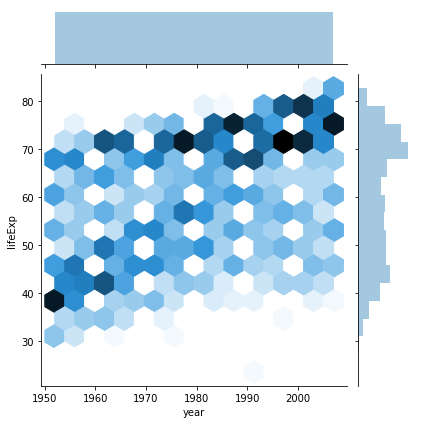

In [9]:
sns.jointplot(x='year', y='lifeExp', kind='hex', data=data)

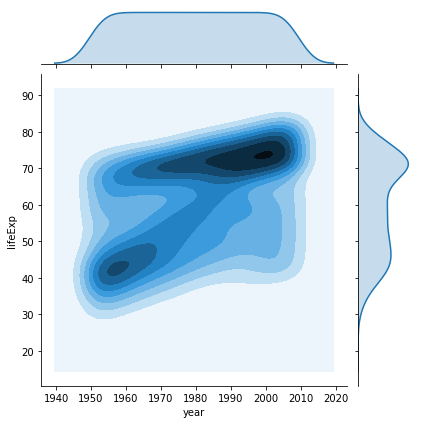

In [10]:
sns.jointplot(x='year', y='lifeExp', kind='kde', data=data)

## Are wealth and health correlated?


In [26]:
data[['lifeExp', 'gdpPercap']].corr()

,lifeExp,gdpPercap
lifeExp,1.000000,0.583706
gdpPercap,0.583706,1.000000


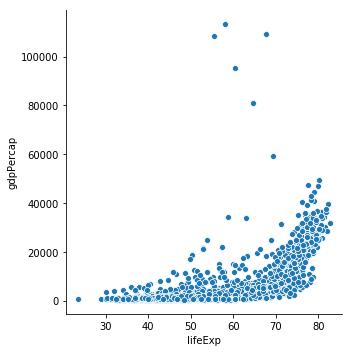

In [16]:
sns.relplot(x='lifeExp', y='gdpPercap', kind='scatter', data=data)

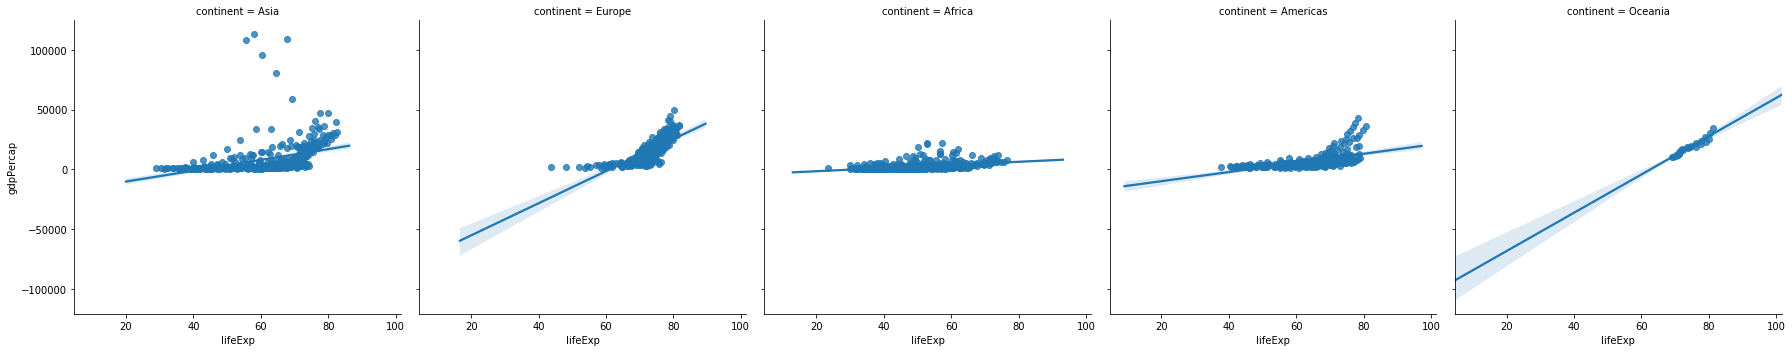

In [20]:
sns.lmplot(x='lifeExp', y='gdpPercap', col='continent', data=data)

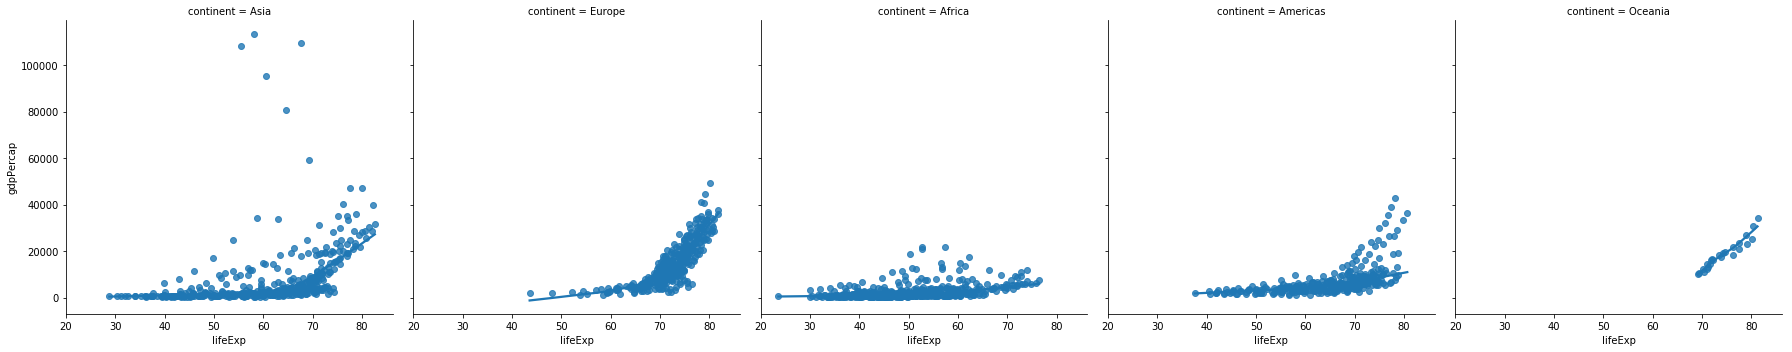

In [22]:
sns.lmplot(x='lifeExp', y='gdpPercap', col='continent', lowess=True, data=data)

## Does correlation between wealth and health increase or decrease overtime?



In [44]:
data.groupby('year')[['lifeExp', 'gdpPercap']].corr()

lifeExp  gdpPercap
year                               
1952 lifeExp    1.000000   0.278024
     gdpPercap  0.278024   1.000000
1957 lifeExp    1.000000   0.303745
     gdpPercap  0.303745   1.000000
1962 lifeExp    1.000000   0.383221
     gdpPercap  0.383221   1.000000
1967 lifeExp    1.000000   0.480140
     gdpPercap  0.480140   1.000000
1972 lifeExp    1.000000   0.459701
     gdpPercap  0.459701   1.000000
1977 lifeExp    1.000000   0.619864
     gdpPercap  0.619864   1.000000
1982 lifeExp    1.000000   0.722763
     gdpPercap  0.722763   1.000000
1987 lifeExp    1.000000   0.749905
     gdpPercap  0.749905   1.000000
1992 lifeExp    1.000000   0.704715
     gdpPercap  0.704715   1.000000
1997 lifeExp    1.000000   0.703644
     gdpPercap  0.703644   1.000000
2002 lifeExp    1.000000   0.681858
     gdpPercap  0.681858   1.000000
2007 lifeExp    1.000000   0.678662
     gdpPercap  0.678662   1.000000

In [30]:
idx = pd.IndexSlice

In [47]:
correlations = data.groupby('year')[['lifeExp', 'gdpPercap']].corr()
correlations.loc[ idx[:,'lifeExp'], 'gdpPercap'].unstack()

,lifeExp
year,
1952,0.278024
1957,0.303745
1962,0.383221
1967,0.480140
1972,0.459701
1977,0.619864
1982,0.722763
1987,0.749905
1992,0.704715
